# 激活函数

在神经元中，输入的 inputs 通过加权，求和后，还被作用了一个函数，这个函数就是激活函数 Activation Function

## 作用

如果不用激励函数，每一层输出都是上层输入的线性函数，无论神经网络有多少层，输出都是输入的线性组合。

如果使用的话，激活函数给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中。 

## 常用激活函数

![activation.png](activation.png)

### sigmoid

$$f(x)=\frac{1}{1+exp(-z)}$$

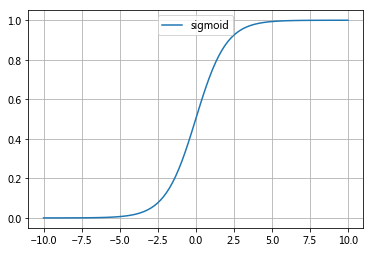

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.linspace(-10,10, 100)
y = sigmoid(x)
plt.plot(x,y, label="sigmoid")
plt.legend(loc="upper center")
plt.grid(True)
plt.show()

历史上，sigmoid函数曾非常常用，然而现在它已经不太受欢迎，实际很少使用了，

**sigmoid的两个缺点**

1. 函数饱和使梯度消失：sigmoid 神经元在值为 0 或 1的时候接近饱和，这些区域，梯度几乎为 0。因此在反向传播时，这个局部梯度会与整个代价函数关于该单元输出的梯度相乘，结果也会接近为 0 。

    这样，几乎就没有信号通过神经元传到权重再到数据了，因此这时梯度就对模型的更新没有任何贡献。除此之外，为了防止饱和，必须对于权重矩阵的初始化特别留意。比如，如果初始化权重过大，那么大多数神经元将会饱和，导致网络就几乎不学习。

2. sigmoid 函数不是关于原点中心对称的

    这个特性会导致后面网络层的输入也不是零中心的，进而影响梯度下降的运作。

    因为如果输入都是正数的话（如 f=wTx+bf=wTx+b 中每个元素都x>0 ），那么关于 w的梯度在反向传播过程中，要么全是正数，要么全是负数（具体依据整个表达式 f而定），这将会导致梯度下降权重更新时出现 z 字型的下降。

    当然，如果是按batch 去训练，那么每个 batch 可能得到不同的信号，整个批量的梯度加起来后可以缓解这个问题。因此，该问题相对于上面的神经元饱和问题来说只是个小麻烦，没有那么严重。

### Relu

Relu激活函数越来越受欢迎，其公式如下

$$f(x) =
\begin{cases} 
0,  & \mbox{if }x < 0 \\
x, & \mbox{if }x \ge 0
\end{cases}$$



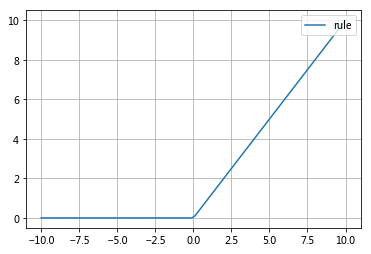

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def rule(x):
    y = x.copy()
    y[y<0] = 0
    return y

x = np.linspace(-10,10, 100)
y = rule(x)
plt.plot(x,y, label="rule")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

**rule优点**

1. 相比起Sigmoid和tanh，ReLU(e.g. a factor of 6in Krizhevsky et al.)在SGD中能够快速收敛。据称，这是因为它线性、非饱和的形式。
2. Sigmoid和tanh涉及了很多很expensive的操作（比如指数），ReLU可以更加简单的实现。
3. 有效缓解了梯度消失的问题。
4. 在没有无监督预训练的时候也能有较好的表现。
5. 提供了神经网络的稀疏表达能力。

**rule缺点**

随着训练的进行，可能会出现神经元死亡，权重无法更新的情况。如果发生这种情况，那么流经神经元的梯度从这一点开始将永远是0。也就是说，ReLU神经元在训练中不可逆地死亡了。 ReLU在训练的时候很”脆弱”，一不小心有可能导致神经元”坏死”。举个例子：由于ReLU在x<0时梯度为0，这样就导致负的梯度在这个ReLU被置零，而且这个神经元有可能再也不会被任何数据激活。如果这个情况发生了，那么这个神经元之后的梯度就永远是0了，也就是ReLU神经元坏死了，不再对任何数据有所响应。实际操作中，如果你的learning rate 很大，那么很有可能你网络中的40%的神经元都坏死了。 当然，如果你设置了一个合适的较小的learning rate，这个问题发生的情况其实也不会太频繁。

对比sigmoid类函数主要变化

- 单侧抑制 
- 相对宽阔的兴奋边界 
- 稀疏激活性

**rule变种**

- Leaky ReLUs 就是用来解决ReLU坏死的问题的。和ReLU不同，当x<0时，它的值不再是0，而是一个较小斜率(如0.01等)的函数。也就是说f(x)=1(x<0)(ax)+1(x>=0)(x),其中a是一个很小的常数。这样，既修正了数据分布，又保留了一些负轴的值，使得负轴信息不会全部丢失。关于Leaky ReLU 的效果，众说纷纭，没有清晰的定论。有些人做了实验发现 LeakyReLU 表现的很好;有些实验则证明并不是这样。 
- PReLU. 对于 Leaky ReLU 中的a，通常都是通过先验知识人工赋值的。然而可以观察到，损失函数对a的导数我们是可以求得的，可不可以将它作为一个参数进行训练呢? Kaiming He 2015的论文《Delving Deep into Rectifiers: Surpassing Human-Level Performance onImageNet Classification》指出，不仅可以训练，而且效果更好。原文说使用了Parametric ReLU后，最终效果比不用提高了1.03%. 
- Randomized Leaky ReLU. Randomized Leaky ReLU 是leaky ReLU 的random 版本, 其核心思想就是，在训练过程中，a是从一个高斯分布中随机出来的，然后再在测试过程中进行修正。 

### tanh

tanh 函数同样存在饱和问题，但它的输出是零中心的，因此实际中 tanh 比 sigmoid 更受欢迎。

$$f(x)=\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{1 - e^{-2x}}{1 + e^{-2x}} = \frac{2}{1 + e^{-2x}}-1$$

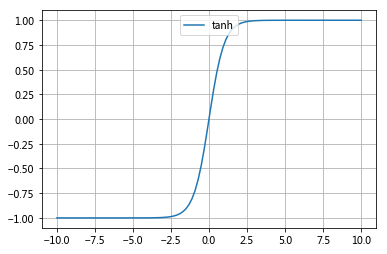

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    y = (1 - np.exp(-2 * x))/ (1 + np.exp(-2 * x))
    return y

x = np.linspace(-10,10, 100)
y = tanh(x)
plt.plot(x,y, label="tanh")
plt.legend(loc="upper center")
plt.grid(True)
plt.show()

**tanh优点**

1. 比Sigmoid函数收敛速度更快。
2. 相比Sigmoid函数，其输出以0为中心。

**tanh缺点**

还是没有改变Sigmoid函数的最大问题——由于饱和性产生的梯度消失。

### ELU



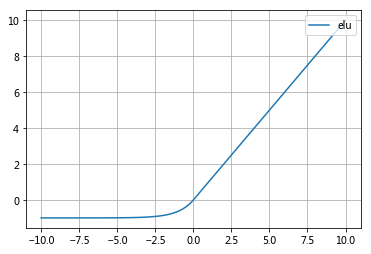

In [21]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def elu(x, a):
    y = x.copy()
    for i in range(y.shape[0]):
        if y[i] < 0:
            y[i] = a * (np.exp(y[i]) - 1)
    return y

x = np.linspace(-10,10, 100)
y = elu(x, 1)
plt.plot(x,y, label="elu")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

## 参考

- [Tensorflow学习笔记（六）几种常见的激活函数介绍及用matplotlib画图](http://blog.csdn.net/weixin_39881922/article/details/79045687)